In [24]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [22]:
# Read the CSV file
df = pd.read_csv('metadata_updated.csv')

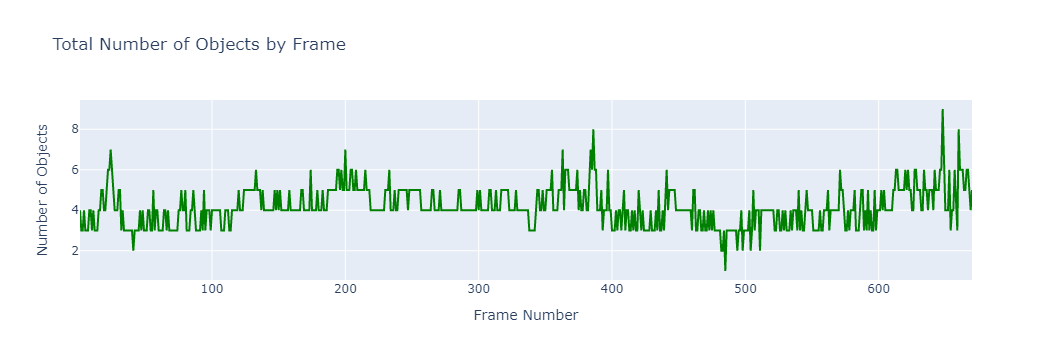

In [20]:
# Get the count of instances for each frame number
frame_counts = df['frame_number'].value_counts().sort_index()

# Create a trace for the line chart
trace = go.Scatter(
    x=frame_counts.index,
    y=frame_counts.values,
    mode='lines',
    name='Number of Instances',
    line_color = 'green'
)

# Create a layout for the chart
layout = go.Layout(
    title='Total Number of Objects by Frame',
    xaxis=dict(title='Frame Number'),
    yaxis=dict(title='Number of Objects')
)

# Create a figure object
fig = go.Figure(data=[trace], layout=layout)

# Show the chart
fig.show()

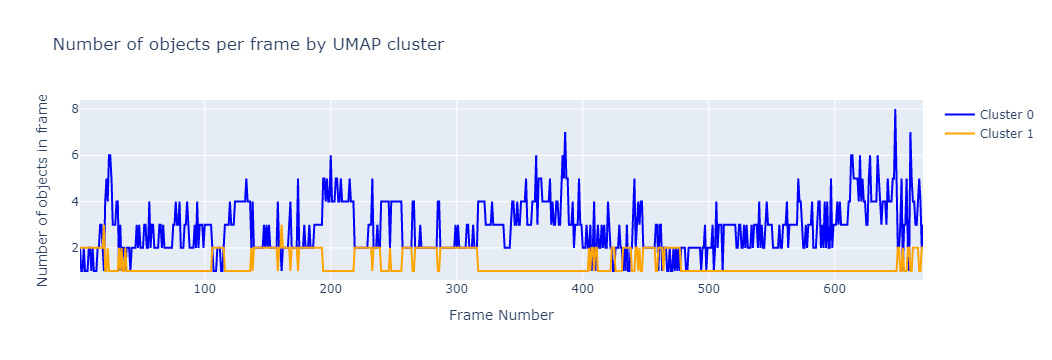

In [17]:
# Group the data by umap cluster label and frame number,
# and count the instances of each combination
grouped_df = df.groupby(['umap_cluster_label', 'frame_number']).size().reset_index(name='count')

# Create a trace for each umap cluster label
traces = []
for label in grouped_df['umap_cluster_label'].unique():
    color = 'blue' if label == 0 else 'orange'  # set the color based on the label
    trace = go.Scatter(
        x=grouped_df[grouped_df['umap_cluster_label'] == label]['frame_number'],
        y=grouped_df[grouped_df['umap_cluster_label'] == label]['count'],
        mode='lines',
        name='Cluster ' + str(label),
        line=dict(color=color, width=2, dash='solid')
    )
    traces.append(trace)

# Create a layout for the chart
layout = go.Layout(
    title='Number of objects per frame by UMAP cluster',
    xaxis=dict(title='Frame Number'),
    yaxis=dict(title='Number of objects in frame')
)

# Create a figure object
fig = go.Figure(data=traces, layout=layout)

# Show the chart
fig.show()
